## Dataset description:
Dataset UCI Adult: classify people using demographical data - whether they earn more than $50,000 per year or not.

### Feature descriptions:
```python
Age – continuous feature
Workclass – continuous feature
fnlwgt – final weight of object, continuous feature
Education – categorical feature
Education_Num – number of years of education, continuous feature
Martial_Status – categorical feature
Occupation – categorical feature
Relationship – categorical feature
Race – categorical feature
Sex – categorical feature
Capital_Gain – continuous feature
Capital_Loss – continuous feature
Hours_per_week – continuous feature
Country – categorical feature
Target – earnings level, categorical (binary) feature.
```

## Loading Libraries

In [179]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import warnings
warnings.filterwarnings("ignore")
import pydotplus #pip install pydotplus

### Reading Train and Test data

In [180]:
data_train = pd.read_csv('adult_train.csv')

data_train.tail()

Age      Workclass  fnlwgt    Education  Education_Num  \
32556   27        Private  257302   Assoc-acdm             12   
32557   40        Private  154374      HS-grad              9   
32558   58        Private  151910      HS-grad              9   
32559   22        Private  201490      HS-grad              9   
32560   52   Self-emp-inc  287927      HS-grad              9   

            Martial_Status          Occupation Relationship    Race      Sex  \
32556   Married-civ-spouse        Tech-support         Wife   White   Female   
32557   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32558              Widowed        Adm-clerical    Unmarried   White   Female   
32559        Never-married        Adm-clerical    Own-child   White     Male   
32560   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       Capital_Gain  Capital_Loss  Hours_per_week         Country  Target  
32556             0             0              38   United-States   <=50K  
32557             0             0              40   United-States    >50K  
32558             0             0              40   United-States   <=50K  
32559             0             0              20   United-States   <=50K  
32560         15024             0              40   United-States    >50K

In [181]:
data_test = pd.read_csv('adult_test.csv')
data_test.tail()

Age      Workclass    fnlwgt   Education  Education_Num  \
16277  39        Private  215419.0   Bachelors           13.0   
16278  64            NaN  321403.0     HS-grad            9.0   
16279  38        Private  374983.0   Bachelors           13.0   
16280  44        Private   83891.0   Bachelors           13.0   
16281  35   Self-emp-inc  182148.0   Bachelors           13.0   

            Martial_Status        Occupation     Relationship  \
16277             Divorced    Prof-specialty    Not-in-family   
16278              Widowed               NaN   Other-relative   
16279   Married-civ-spouse    Prof-specialty          Husband   
16280             Divorced      Adm-clerical        Own-child   
16281   Married-civ-spouse   Exec-managerial          Husband   

                      Race      Sex  Capital_Gain  Capital_Loss  \
16277                White   Female           0.0           0.0   
16278                Black     Male           0.0           0.0   
16279                White     Male           0.0           0.0   
16280   Asian-Pac-Islander     Male        5455.0           0.0   
16281                White     Male           0.0           0.0   

       Hours_per_week         Country   Target  
16277            36.0   United-States   <=50K.  
16278            40.0   United-States   <=50K.  
16279            50.0   United-States   <=50K.  
16280            40.0   United-States   <=50K.  
16281            60.0   United-States    >50K.

### Remove rows with 'nan' values from test dataset with respect to target variable and encode target variable as `0` and `1` for train and test data.

In [182]:
print(data_test.Target.isna().sum())
print(data_train.Target.isna().sum())

1
0


In [183]:
data_test = data_test[~data_test.Target.isna()]
print(data_test.Target.isna().sum())

0


In [184]:
print(data_test.Target.unique())
print(data_train.Target.unique())

[' <=50K.' ' >50K.']
[' <=50K' ' >50K']


In [185]:
data_test.Target = data_test.Target.str.replace('.','')

In [186]:
print(data_test.Target.unique())

[' <=50K' ' >50K']


In [187]:
lb = LabelEncoder()
data_train['Target'] = lb.fit_transform(data_train['Target'])


In [188]:
data_test['Target'] = lb.transform(data_test['Target'])
data_test.head()

Age   Workclass    fnlwgt      Education  Education_Num  \
1  25     Private  226802.0           11th            7.0   
2  38     Private   89814.0        HS-grad            9.0   
3  28   Local-gov  336951.0     Assoc-acdm           12.0   
4  44     Private  160323.0   Some-college           10.0   
5  18         NaN  103497.0   Some-college           10.0   

        Martial_Status          Occupation Relationship    Race      Sex  \
1        Never-married   Machine-op-inspct    Own-child   Black     Male   
2   Married-civ-spouse     Farming-fishing      Husband   White     Male   
3   Married-civ-spouse     Protective-serv      Husband   White     Male   
4   Married-civ-spouse   Machine-op-inspct      Husband   Black     Male   
5        Never-married                 NaN    Own-child   White   Female   

   Capital_Gain  Capital_Loss  Hours_per_week         Country  Target  
1           0.0           0.0            40.0   United-States       0  
2           0.0           0.0            50.0   United-States       0  
3           0.0           0.0            40.0   United-States       1  
4        7688.0           0.0            40.0   United-States       1  
5           0.0           0.0            30.0   United-States       0

### Find the statistics of the test data and count the distribution of target variable in train data 

In [189]:
data_train.Target.value_counts()

0    24720
1     7841
Name: Target, dtype: int64

In [190]:
data_test.describe(include='all').T

count unique                  top   freq      mean       std  \
Age             16281     73                   35    461       NaN       NaN   
Workclass       15318      8              Private  11210       NaN       NaN   
fnlwgt          16281    NaN                  NaN    NaN    189436    105715   
Education       16281     16              HS-grad   5283       NaN       NaN   
Education_Num   16281    NaN                  NaN    NaN   10.0729   2.56755   
Martial_Status  16281      7   Married-civ-spouse   7403       NaN       NaN   
Occupation      15315     14       Prof-specialty   2032       NaN       NaN   
Relationship    16281      6              Husband   6523       NaN       NaN   
Race            16281      5                White  13946       NaN       NaN   
Sex             16281      2                 Male  10860       NaN       NaN   
Capital_Gain    16281    NaN                  NaN    NaN   1081.91   7583.94   
Capital_Loss    16281    NaN                  NaN    NaN   87.8993   403.105   
Hours_per_week  16281    NaN                  NaN    NaN   40.3922   12.4793   
Country         16007     40        United-States  14662       NaN       NaN   
Target          16281    NaN                  NaN    NaN  0.236226  0.424776   

                  min     25%     50%     75%         max  
Age               NaN     NaN     NaN     NaN         NaN  
Workclass         NaN     NaN     NaN     NaN         NaN  
fnlwgt          13492  116736  177831  238384  1.4904e+06  
Education         NaN     NaN     NaN     NaN         NaN  
Education_Num       1       9      10      12          16  
Martial_Status    NaN     NaN     NaN     NaN         NaN  
Occupation        NaN     NaN     NaN     NaN         NaN  
Relationship      NaN     NaN     NaN     NaN         NaN  
Race              NaN     NaN     NaN     NaN         NaN  
Sex               NaN     NaN     NaN     NaN         NaN  
Capital_Gain        0       0       0       0       99999  
Capital_Loss        0       0       0       0        3770  
Hours_per_week      1      40      40      45          99  
Country           NaN     NaN     NaN     NaN         NaN  
Target              0       0       0       0           1

In [191]:
print(data_train.Target.value_counts()/data_train.shape[0])
print(data_test.Target.value_counts()/data_test.shape[0])

0    0.75919
1    0.24081
Name: Target, dtype: float64
0    0.763774
1    0.236226
Name: Target, dtype: float64


### Plot the distribution of each feature, so that we have a better understanding about the distribution of each feature. Draw the number of values for each category feature and the histogram of the values for each continuous feature.

In [192]:
cols = data_train.columns
num_cols = list(data_train._get_numeric_data().columns)
cat_cols = list(set(cols) - set(num_cols))
print(num_cols)
print(cat_cols)
data_train.shape[1]/

SyntaxError: invalid syntax (<ipython-input-192-d62811828ed4>, line 6)

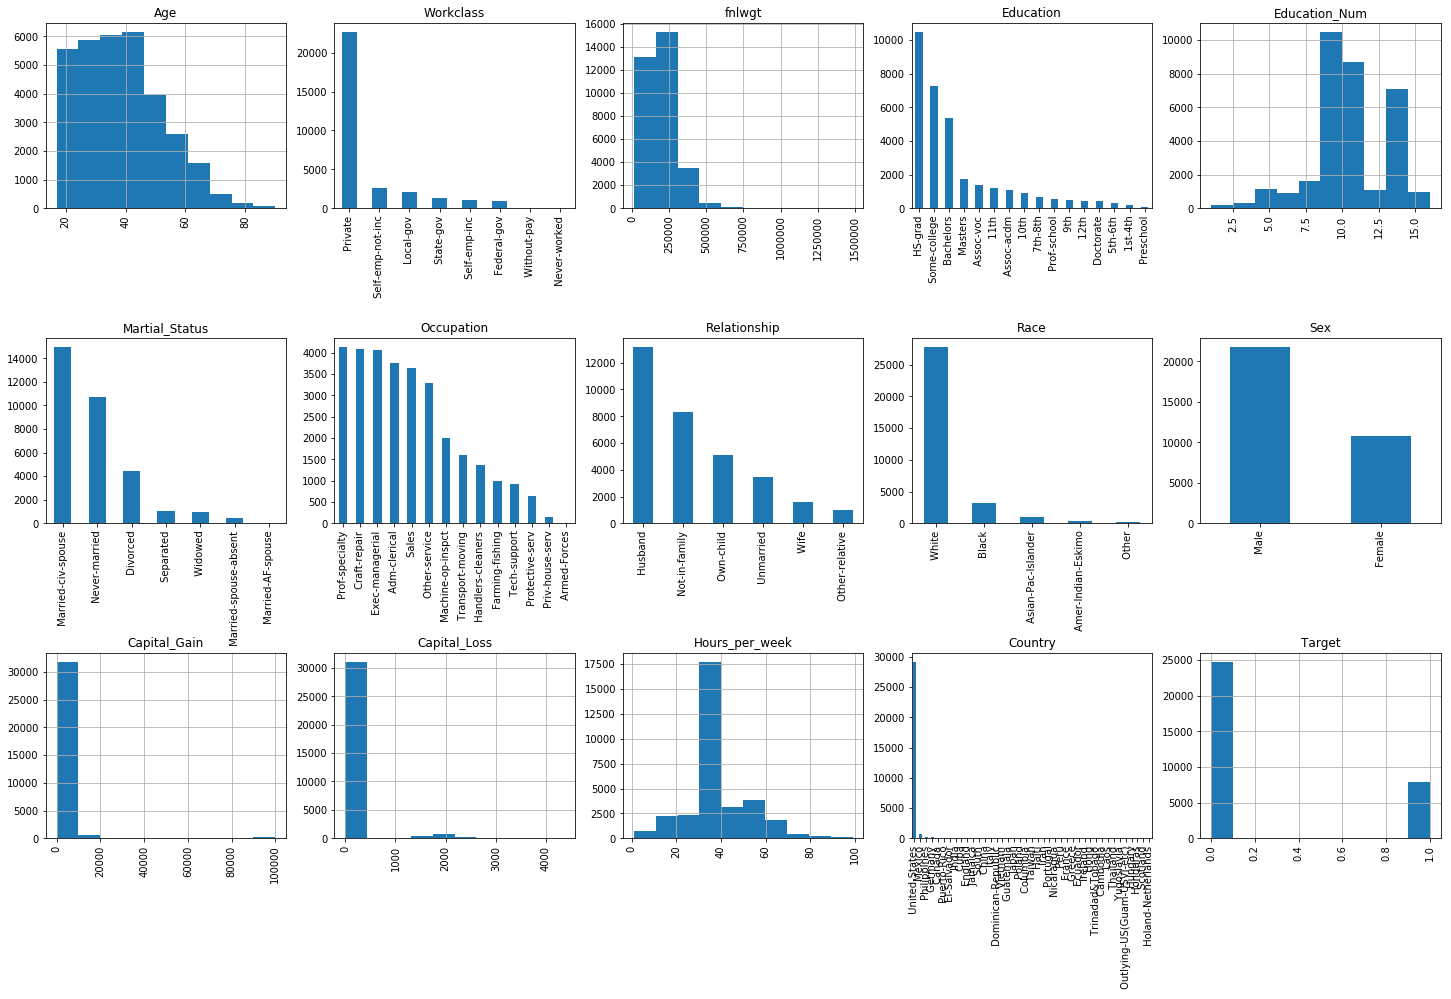

In [193]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data_train.shape[1]) / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == np.object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [194]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data_train.shape[1]) / cols)
for i,column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if column in num_cols:
        #sns.distplot(data_train[column], ax=ax1)
        #data_train[column].hist(axes=ax)
        #plt.xticks(rotation="vertical")        
        #plt.show()
    else:
        #sns.countplot(data_train[column], ax=ax1)
        #data_train[column].value_counts().plot(kind="bar", axes=ax)
       #plt.show()
plt.subplots_adjust(hspace=0.7, wspace=0.2)

IndentationError: expected an indented block (<ipython-input-194-36a9edc60a17>, line 12)

### Calculate the percentage of adults from each country in the data *

In [ ]:
100 * (data_train.Country.value_counts()/data_train.shape[0]).head()

### Check the data types of train and test data *

In [ ]:
data_train.dtypes
data_test.dtypes

### As we have seen in the earlier task, the data type of age in the test data is object type, so we will have to convert the data type of `Age` column in the test data to `int` type. 

In [195]:
data_test['Age'] = data_test['Age'].astype(int)

### Also cast all float features to int type to keep types consistent between our train and test data.

In [196]:
for col in data_test.select_dtypes(include=float).columns:
    data_test[col] = data_test[col].astype(int)


In [197]:
data_test.dtypes

Age                int32
Workclass         object
fnlwgt             int32
Education         object
Education_Num      int32
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int32
Capital_Loss       int32
Hours_per_week     int32
Country           object
Target             int32
dtype: object

### We have to treat categorical and numerical data in different ways for cleaning the data and encoding, so we will have to store these in two different columns. Choose categorical and continuous features from train data and store in different variables. 

In [198]:
from scipy import stats

In [199]:
cat_df.mode().iloc[0]

Workclass                     Private
Education                     HS-grad
Martial_Status     Married-civ-spouse
Occupation             Prof-specialty
Relationship                  Husband
Race                            White
Sex                              Male
Country                 United-States
Name: 0, dtype: object

In [200]:
def transform_dtypes(df):
    cat_df = df.select_dtypes(include=object)
    num_df = df.select_dtypes(exclude=object)
    
    num_df = num_df.fillna(np.median)
    cat_df = cat_df.fillna(cat_df.mode().iloc[0])
    
    return pd.concat([num_df,cat_df],axis = 1)

In [201]:
train_df = transform_dtypes(data_train)

In [202]:
test_df = transform_dtypes(data_test)

### As we have already separated the numerical and categorical columns, we will fill in missing data for continuous features with their median values, for categorical features with their mode

In [203]:
#num_df = num_df.fillna(np.median)

In [204]:
#cat_df = cat_df.fillna(cat_df.mode())

### Machines only understand numbers, so we will have to represent the categorical variables in a way so that the computer understands it, so we will first label encode and then one hot encode the categorical variables. We'll dummy code some categorical features: Workclass, Education, Martial_Status, Occupation, Relationship, Race, Sex, Country. It can be done via pandas method get_dummies

In [205]:
train_df.shape

(32561, 15)

In [206]:
test_df.shape

(16281, 15)

In [207]:
train_df.Relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [208]:
test_df.Relationship.value_counts()

 Husband           6523
 Not-in-family     4278
 Own-child         2513
 Unmarried         1679
 Wife               763
 Other-relative     525
Name: Relationship, dtype: int64

In [210]:
for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

### Split train and test data into X_train ,y_train,X_test and y_test data

In [211]:
X_train = train_df.drop('Target',1)
y_train = train_df.Target
X_test = test_df.drop('Target',1)
y_test = test_df.Target

### Lets now train our data with Decision tree model. We will then predict our test data and compute the accuracy.

* Train a decision tree (DecisionTreeClassifier) with a maximum depth of 3, and evaluate the accuracy metric on the test data. Use parameter random_state = 17 for results reproducibility.

In [212]:
model = DecisionTreeClassifier(max_depth=3,random_state=17)

In [213]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [214]:
print('Train Accuracy',model.score(X_train,y_train))
print('Test Accuracy',model.score(X_test,y_test))

Train Accuracy 0.8399004944565585
Test Accuracy 0.839199066396413


### We see that the accuracy we got is 84% without using parameter tuning Now lets see if we can increase our model accuracy by using Decision tree with parameter tuning
* Create a dictionary with Key as `'max_depth'` and value as `range(2,11)` and save it as tree_params.
* Train a decision tree (DecisionTreeClassifier(random_state = 17),tree_params). Find the optimal maximum depth using 5-fold cross-validation (GridSearchCV).

### Print out optimal maximum depth(i.e. best_params_ attribute of GridSearchCV) and best_score_  

### Train a decision tree with maximum depth of 9 (it is the best max_depth in my case), and compute the test set accuracy. Use parameter random_state = 17 for reproducibility.

### Lets plot the decision tree and see its distibution of classes

* Use the tree.export_graphviz() module to create the graphic visualization object of the learned tree classifier .Input the parameters tuned_tree, out_file=None, feature_names=X_train.columns, filled = True, class_names=['class_no','class_yes'] and save it as dot_data

* Use the pydotplus.graph_from_dot_data() module to draw the graph. Save it as graph

* To display the graph we save the above created image into a file and display it using matplotlib as  Image(graph.create_png())